<a href="https://colab.research.google.com/github/pjcroxas/Transportation-Data-Science/blob/main/DRIVERs_Accident_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pip install basemap

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime as dt
import datetime
import warnings, os
from mpl_toolkits.basemap import Basemap
warnings.filterwarnings('ignore')

In [4]:
dirs = "/content/drive/My Drive/Data Science Portfolio/Transportation Analytics"
crash_df = pd.read_excel(dirs+"/DRIVERs_2017_2021.xlsx")
crash_df.sample(3)

,record_id,timezone,created,modified,occurred_from,occurred_to,lat,lon,location_text,city,...,Hospital,driverPerson_id,Last Name,First Name,Involvment,Middle Name,Driver error,Alcohol/drugs,License Number,Seat belt/helmet
21764,01058361-bf94-49b9-9543-21e05b4b5ec4,UTC,2019-06-03 01:55:46,2019-06-03 01:55:46,2019-06-02 23:13:23,2019-06-02 23:13:23,14.643740,121.036592,"Nexor, Quezon Avenue, West Triangle, District ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20633,9a53e838-0c1c-4ec4-b731-9b777851082a,UTC,2019-07-16 13:33:01,2019-07-16 13:33:01,2019-07-16 12:35:05,2019-07-16 12:35:05,14.582005,121.054230,"Shaw Tunnel, Highway Hills, Mandaluyong, Metro...",Mandaluyong,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12401,96933407-fbc0-4529-97ee-15fb950c0740,UTC,2018-08-25 01:17:22,2018-08-25 01:17:22,2018-08-25 01:09:45,2018-08-25 01:09:45,14.609747,121.055743,"LandBank, Bonny Serrano Avenue, Villa Maria Cl...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dataframe Shape
crash_df.shape

(32271, 41)

# **Feature Engineering**

In [6]:
# Extract Date Features
crash_df["occurred_day"] = crash_df["occurred_from"].dt.day
crash_df["occurred_dayofweek"] = crash_df["occurred_from"].dt.day_name()
crash_df["occurred_weekday"] = crash_df["occurred_from"].dt.weekday
crash_df["occurred_hour"] = crash_df["occurred_from"].dt.hour
crash_df["occurred_month"] = crash_df["occurred_from"].dt.month
crash_df["occurred_year"] = crash_df["occurred_from"].dt.year

crash_df.sample(3)

,record_id,timezone,created,modified,occurred_from,occurred_to,lat,lon,location_text,city,...,Driver error,Alcohol/drugs,License Number,Seat belt/helmet,occurred_day,occurred_dayofweek,occurred_weekday,occurred_hour,occurred_month,occurred_year
23292,c14af090-0995-4c36-855a-eb29be71ec55,UTC,2019-04-09 12:59:37,2019-04-09 12:59:37,2019-04-09 08:54:53,2019-04-09 08:54:53,14.652849,121.051998,"Commonwealth Avenue, Old Capitol Site, Quezon ...",Quezon City,...,NaN,NaN,NaN,NaN,9.0,Tuesday,1.0,8.0,4.0,2019.0
19972,35c3a1bc-4c45-4c14-8b19-d2e055733703,UTC,2019-08-21 21:36:09,2019-08-21 21:36:09,2019-08-21 21:19:14,2019-08-21 21:19:14,14.585868,121.055946,"Highway 54, EDSA, Wack-Wack Greenhills, Mandal...",Mandaluyong,...,NaN,NaN,NaN,NaN,21.0,Wednesday,2.0,21.0,8.0,2019.0
12040,62dc6d65-3bd2-4ffe-8575-4a7d54294719,UTC,2018-09-05 06:54:11,2018-09-05 06:54:11,2018-09-05 02:30:32,2018-09-05 02:30:32,14.580925,121.053629,"Shaw Boulevard, Highway Hills, Mandaluyong, Me...",Mandaluyong,...,NaN,NaN,NaN,NaN,5.0,Wednesday,2.0,2.0,9.0,2018.0


# **Data Quality Inspection**

Text(0.5, 1.0, 'Number of Misssing rows per Column')

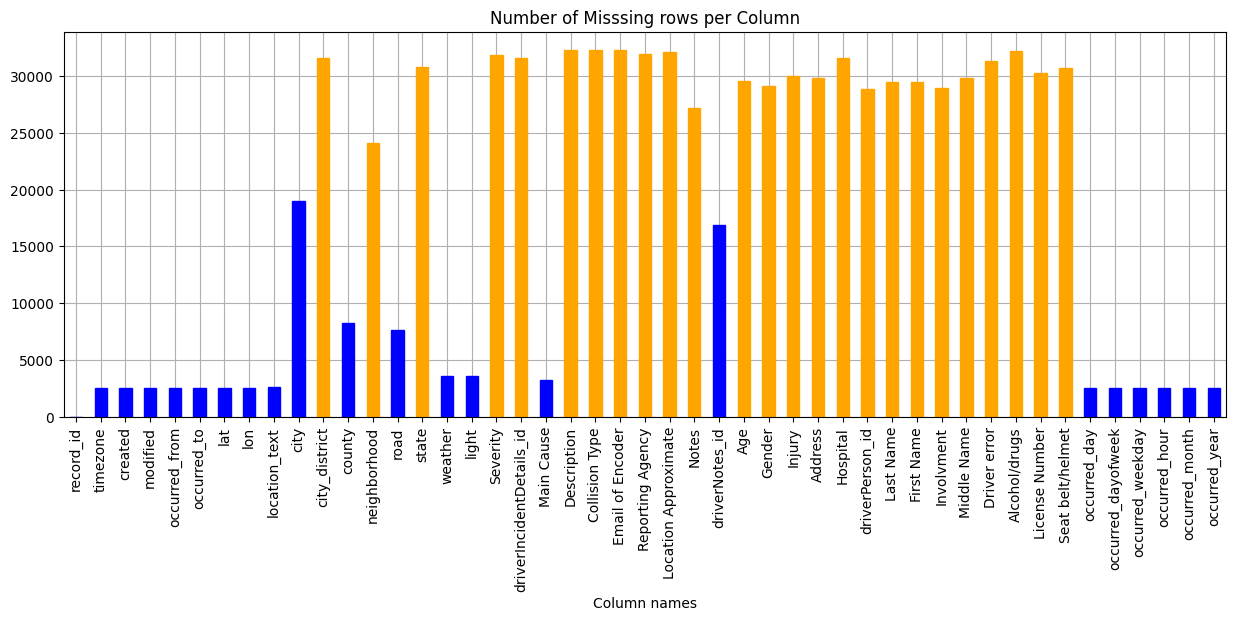

In [8]:
# Missing Data

cm = sns.light_palette("green", as_cmap=True)
crash_dq = crash_df.isnull().sum().reset_index()
crash_dq.rename(columns={"index": "Column names",
                               0: "Missing rows"}, inplace=True)
crash_dq.set_index("Column names", inplace=True)
ax = crash_dq.plot(kind="bar", figsize=(15, 5))

colors = ['blue' if val < 20000 else 'orange' for val in crash_dq['Missing rows']]

# Applying custom colors to the bars
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])
ax.set_axisbelow(True)
ax.get_legend().remove()
ax.grid()
plt.title("Number of Misssing rows per Column")

# **Analyzing the Situation**

Text(0, 0.5, ' ')

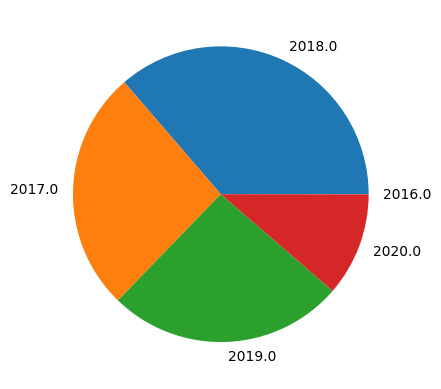

In [9]:
# crash_df["occurred_year"] = crash_df["occurred_year"].astype(int)
crash_df["occurred_year"].value_counts().plot(kind="pie")
plt.ylabel(" ")

The largest number of recorded accidents was on 2018, while the lowest were in 2016. Notice that there is no recorded accidents for 2021, that is because the reported accidents on this year happen on 2020.

In [10]:
# Person involved
crash_inv = crash_df.groupby(['record_id']).count()['timezone'].reset_index()
crash_inv.rename(columns={'timezone':'no. of person involved'}, inplace=True)

In [11]:
def collision_or_crash(data):
  if data > 1:
    return 'Multi-vehicle crash'
  elif data == 1:
    return 'Single vehicle crash'
  else:
    pass

crash_inv["classification"] = crash_inv["no. of person involved"].apply(collision_or_crash)

Text(0, 0.5, 'No. of persons involved')

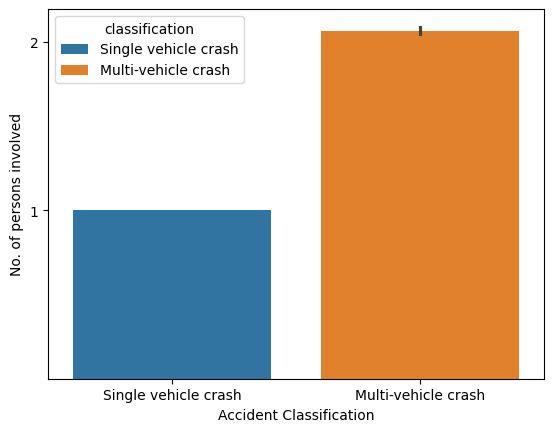

In [12]:
sns.barplot(crash_inv,
            x="classification",
            y="no. of person involved",
            hue="classification")
plt.yticks([1, 2])
plt.xlabel("Accident Classification")
plt.ylabel("No. of persons involved")

Event Involvement

On average, there are more people involved colliding with other people or vehicle than people crashing by itself.

Accident Location

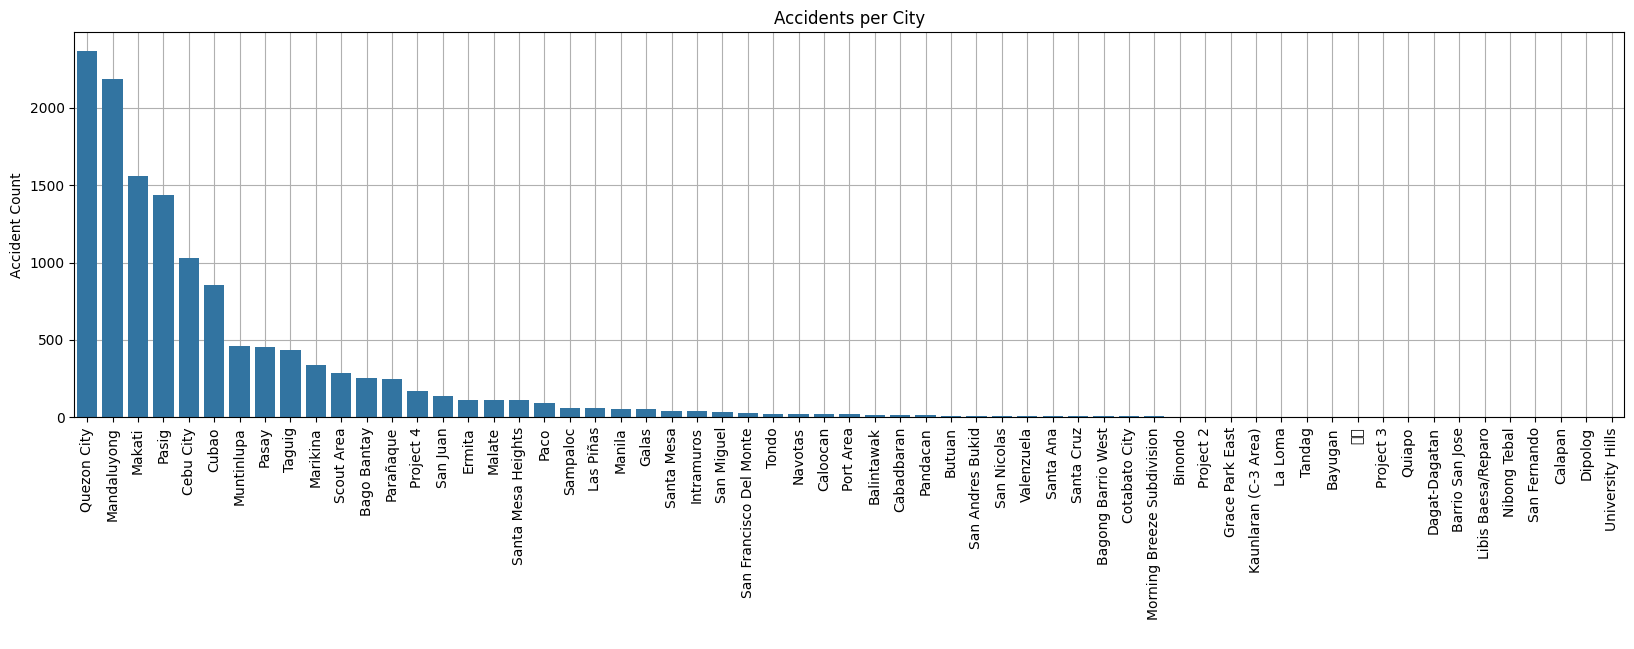

In [13]:
crash_city = crash_df.groupby(["city"]).count()["timezone"].reset_index()
crash_city.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_city.rename(columns={'timezone':'accident count'}, inplace=True)

plt.figure(figsize=[20, 5])
ax = sns.barplot(x=crash_city["city"], y=crash_city["accident count"])
plt.ylabel("Accident Count", fontsize=10)
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.title("Accidents per City")
ax.set_axisbelow(True)
ax.grid()

In [21]:
crash_road = crash_df.groupby(["road", "lat", "lon"]).count()["timezone"].reset_index()
crash_road.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_road.rename(columns={'timezone':'accident count'}, inplace=True)

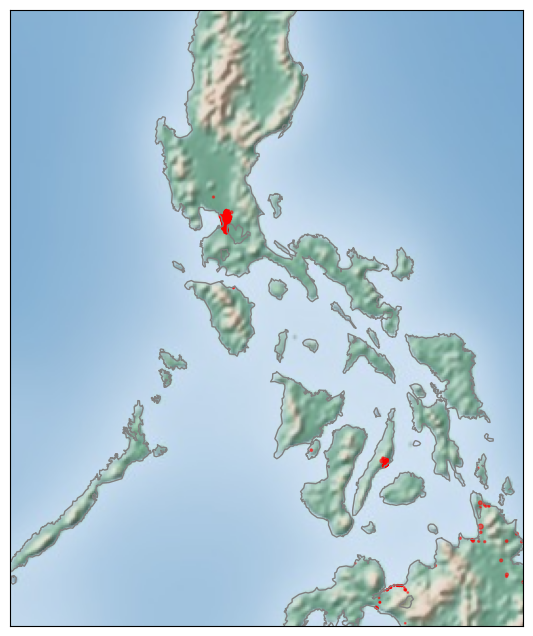

In [23]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='i',
            lat_0=12.8797, lon_0=121.7740,
            width=1E6, height=1.2E6)


m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.scatter(crash_road["lon"], crash_road["lat"], latlon=True,
          s=crash_road["accident count"],
          color='red', alpha=0.5)

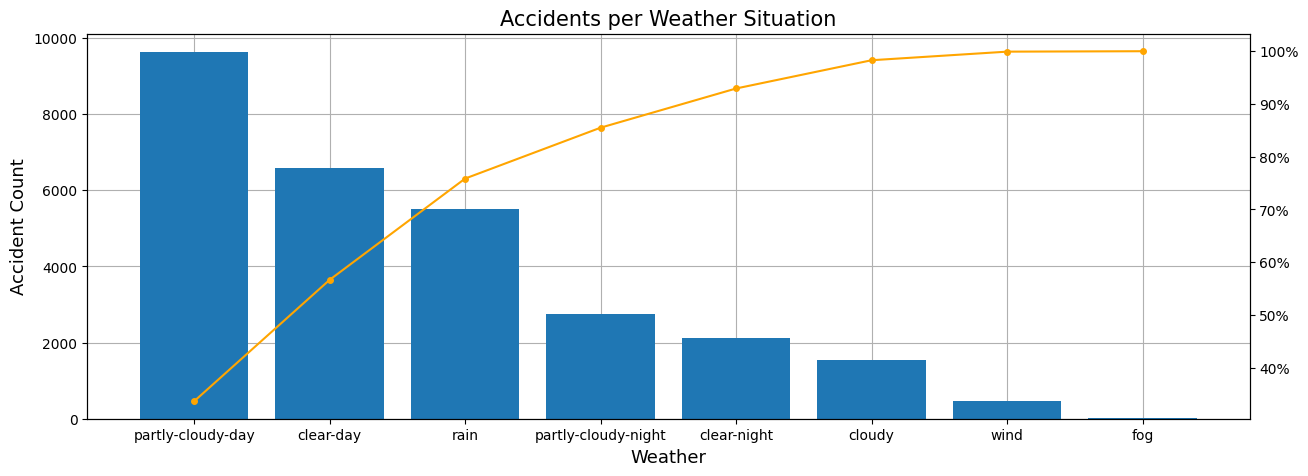

In [27]:
# Accidents caused by weather
crash_weather = crash_df.groupby(['weather']).count()["timezone"].reset_index()
crash_weather.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_weather.rename(columns={"timezone": "Accident Count"}, inplace=True)
crash_weather["cum_percentage"] = crash_weather["Accident Count"].cumsum()/crash_weather["Accident Count"].sum() * 100

# Plot paretto
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(crash_weather.weather, crash_weather["Accident Count"])
plt.ylabel("Accident Count", fontsize=13)
plt.xlabel("Weather", fontsize=13)
plt.title("Accidents per Weather Situation", fontsize=15)

# Add cumulative
ax2 = ax.twinx()
ax2.plot(crash_weather.weather, crash_weather['cum_percentage'], color= "orange", marker="o", ms=4)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_axisbelow(True)
ax.grid()

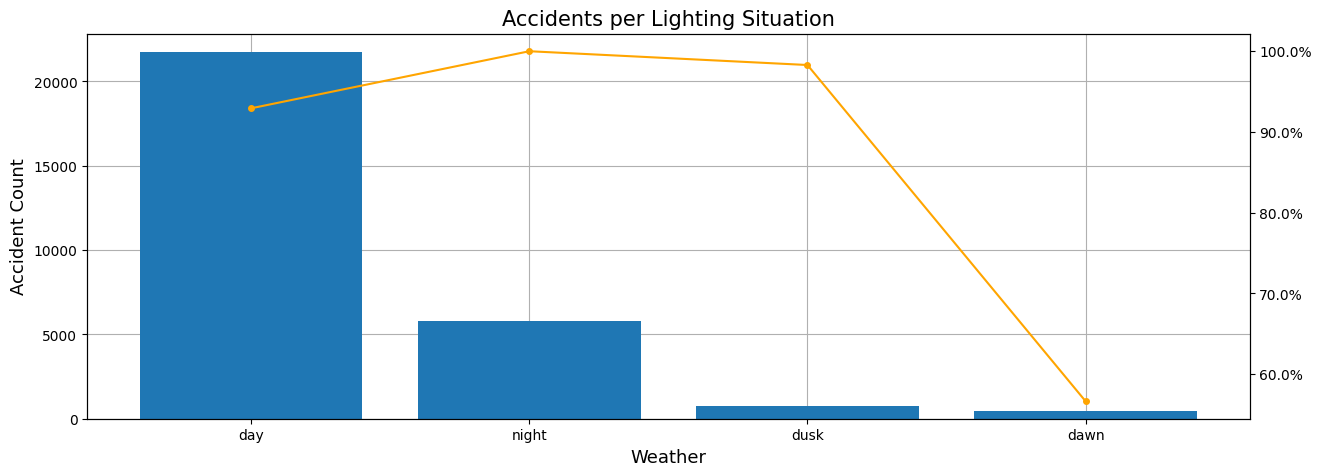

In [28]:
# Accidents caused by lighting
crash_light = crash_df.groupby(['light']).count()["timezone"].reset_index()
crash_light.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_light.rename(columns={"timezone": "Accident Count"}, inplace=True)
crash_light["cum_percentage"] = crash_weather["Accident Count"].cumsum()/crash_weather["Accident Count"].sum() * 100

# Plot paretto
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(crash_light.light, crash_light["Accident Count"])
plt.ylabel("Accident Count", fontsize=13)
plt.xlabel("Weather", fontsize=13)
plt.title("Accidents per Lighting Situation", fontsize=15)

# Add cumulative
ax2 = ax.twinx()
ax2.plot(crash_light.light, crash_light['cum_percentage'], color= "orange", marker="o", ms=4)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_axisbelow(True)
ax.grid()

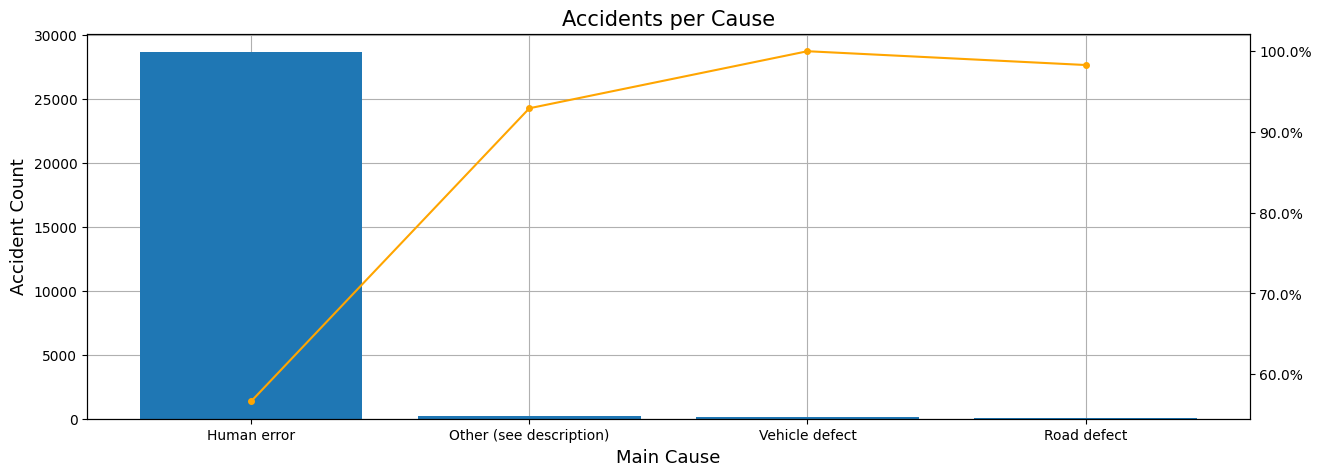

In [29]:
# Accidents causes
crash_cause = crash_df.groupby(['Main Cause']).count()["timezone"].reset_index()
crash_cause.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_cause.rename(columns={"timezone": "Accident Count"}, inplace=True)
crash_cause["cum_percentage"] = crash_weather["Accident Count"].cumsum()/crash_weather["Accident Count"].sum() * 100

# Plot paretto
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(crash_cause["Main Cause"], crash_cause["Accident Count"])
plt.ylabel("Accident Count", fontsize=13)
plt.xlabel("Main Cause", fontsize=13)
plt.title("Accidents per Cause", fontsize=15)

# Add cumulative
ax2 = ax.twinx()
ax2.plot(crash_cause["Main Cause"], crash_cause['cum_percentage'], color= "orange", marker="o", ms=4)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_axisbelow(True)
ax.grid()

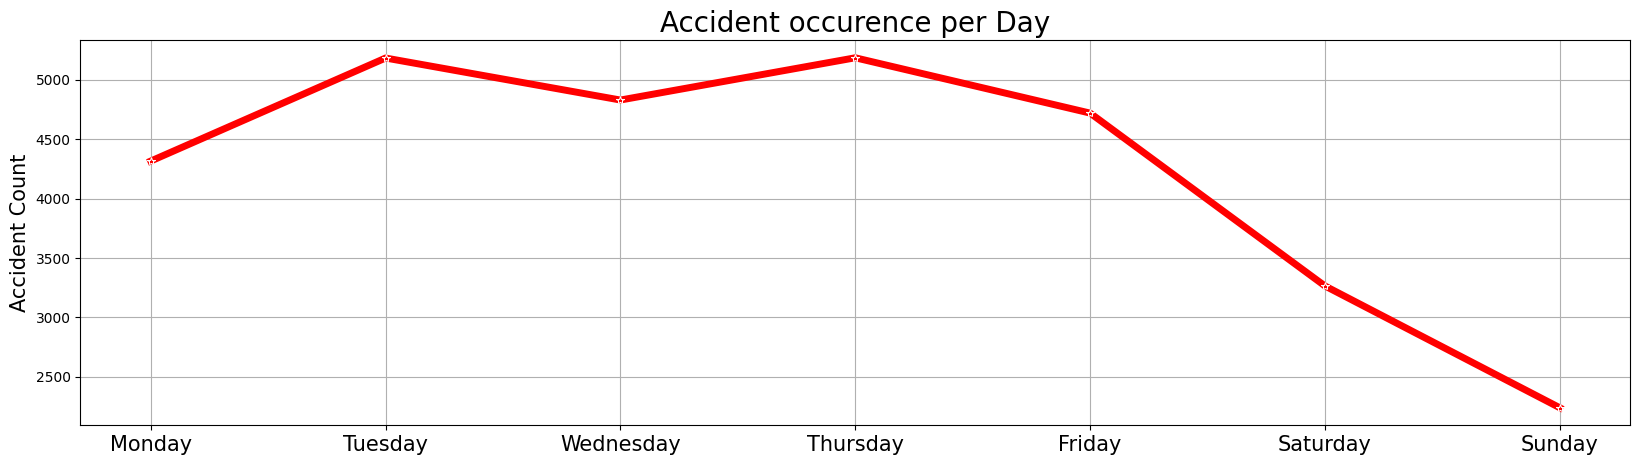

In [30]:
crash_day = crash_df.groupby(["occurred_dayofweek", "occurred_weekday",]).count()["timezone"].reset_index()
crash_day = crash_df.groupby(["occurred_dayofweek", "occurred_weekday"]).count()["timezone"].reset_index()
# crash_day.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_day.rename(columns={'timezone':'accident count'}, inplace=True)
crash_day.sort_values(by=["occurred_weekday"], inplace=True)
plt.figure(figsize=[20, 5])

ax = sns.lineplot(data=crash_day,
            x="occurred_dayofweek",
            y="accident count",
            marker="*",
            linewidth=5,
            color="red")

plt.ylabel("Accident Count", fontsize=15)
plt.xlabel("")
plt.title("Accident occurence per Day", fontsize=20)
plt.xticks(fontsize=15)
plt.grid()

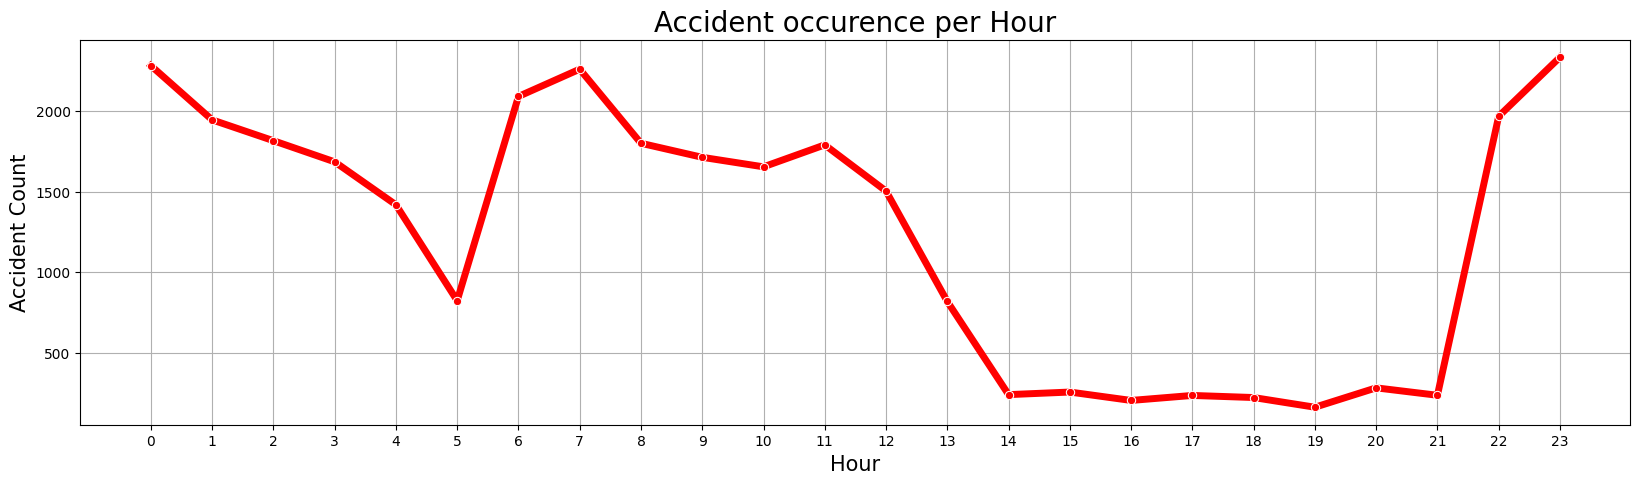

In [39]:
crash_hour = crash_df.groupby(["occurred_hour"]).count()["timezone"].reset_index()
crash_hour.rename(columns={'timezone':'accident count'}, inplace=True)
plt.figure(figsize=[20, 5])

sns.lineplot(data=crash_hour,
            x="occurred_hour",
            y="accident count",
             marker="o",
             color="red",
             linewidth=5)
plt.ylabel("Accident Count", fontsize=15)
plt.xlabel("Hour", fontsize=15)
plt.title("Accident occurence per Hour", fontsize=20)
plt.xticks(range(0, 24))
plt.grid()

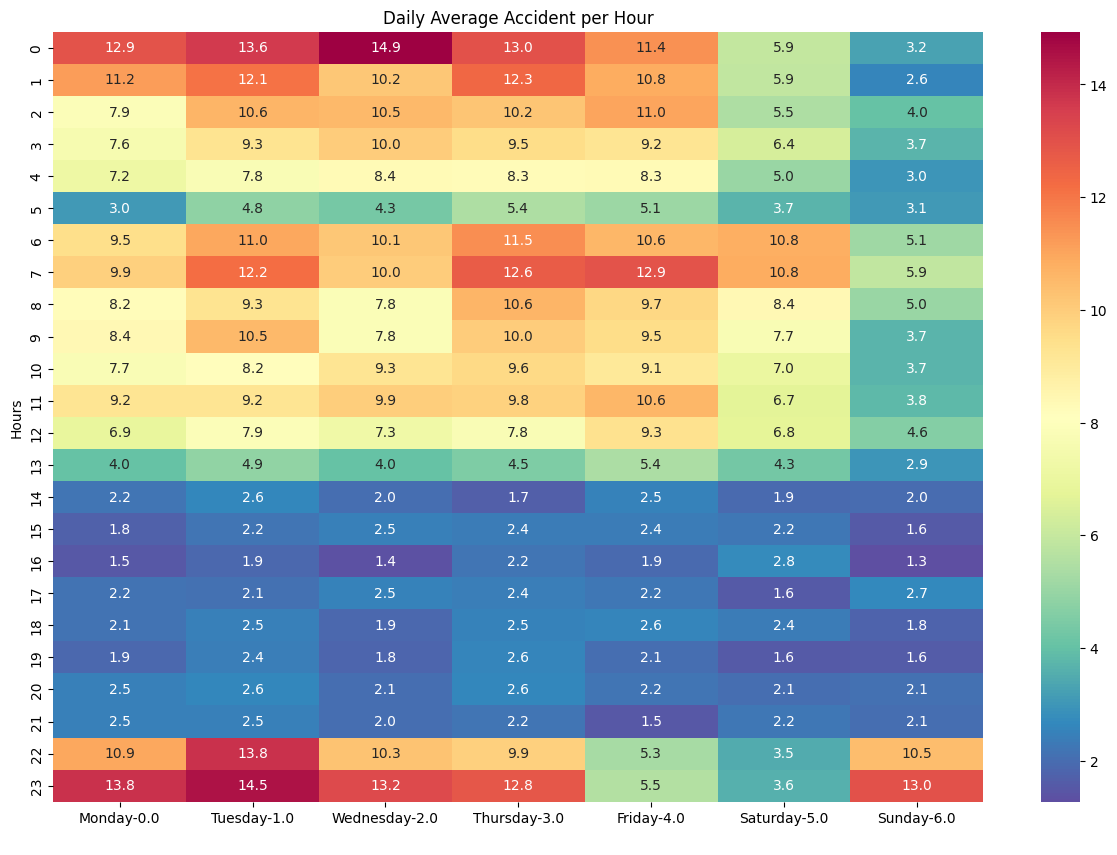

In [32]:
crash_hour_day = crash_df.groupby(["occurred_dayofweek", "occurred_hour", "occurred_day", "occurred_weekday"]).count()["timezone"].reset_index()
crash_hour_weekday = crash_hour_day.groupby(["occurred_dayofweek", "occurred_hour", "occurred_weekday"]).mean()["timezone"].reset_index()
crash_hour_weekday.rename(columns={"timezone":'accident count'}, inplace=True)
crash_hour_weekday.sort_values(by="occurred_weekday", ascending=True, inplace=True)
crash_hour_weekday["occurred_hour"] = crash_hour_weekday["occurred_hour"].astype(int)
crash_pivot = crash_hour_weekday.pivot(index="occurred_hour",
                                   columns=["occurred_dayofweek", "occurred_weekday"],
                                   values="accident count")

plt.figure(figsize=(15,10))
plt.title("Daily Average Accident per Hour")
sns.heatmap(data=crash_pivot,
            annot=True,
            fmt='.1f',
            cmap="Spectral_r")
plt.xlabel(" ")
plt.ylabel("Hours")
plt.show()

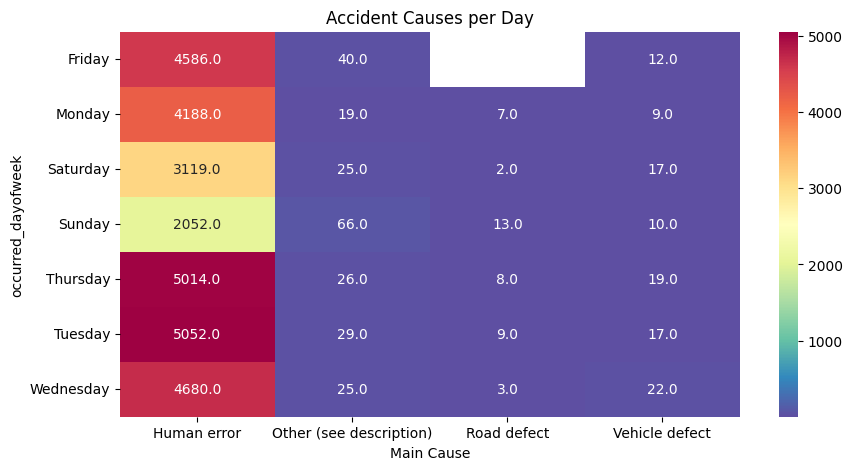

In [43]:
crash_hour_day = crash_df.groupby(["occurred_dayofweek", "Main Cause"]).count()["timezone"].reset_index()
crash_hour_day.rename(columns={"timezone":'accident count'}, inplace=True)
crash_pivot = crash_hour_day.pivot(index="Main Cause",
                                   columns="occurred_dayofweek",
                                   values="accident count")

plt.figure(figsize=(10,5))
plt.title("Accident Causes per Day")
sns.heatmap(data=crash_pivot.T,
            annot=True,
            fmt='.1f',
            cmap="Spectral_r")
plt.show()

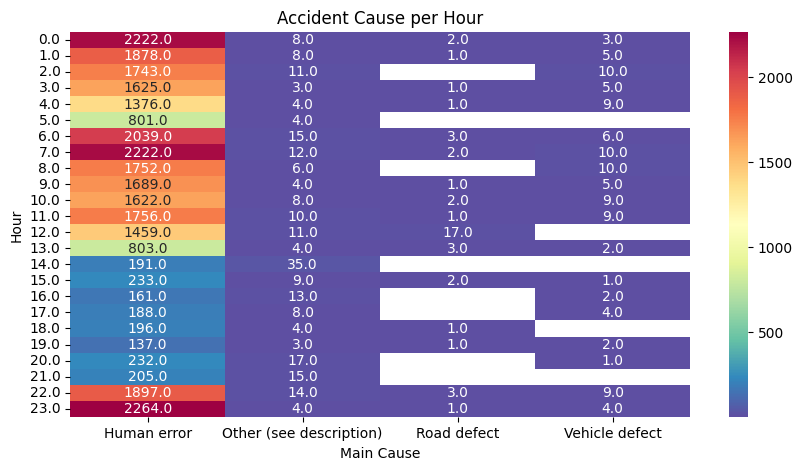

In [44]:
crash_hour_day = crash_df.groupby(["occurred_hour", "Main Cause"]).count()["timezone"].reset_index()
crash_hour_day.rename(columns={"timezone":'accident count'}, inplace=True)
crash_pivot = crash_hour_day.pivot(index="Main Cause",
                                   columns="occurred_hour",
                                   values="accident count")

plt.figure(figsize=(10,5))
plt.title("Accident Cause per Hour")
sns.heatmap(data=crash_pivot.T,
            annot=True,
            fmt='.1f',
            cmap="Spectral_r")
plt.ylabel("Hour")
plt.show()

# **Text Analysis: Enforcer's Notes**

In [45]:
from wordcloud import STOPWORDS
import re

In [47]:
stopwords = set(STOPWORDS)

class text_cleaning():
    def __init__(self, text):
        self.text = text
        self.new_text = self.remove_special_chars()

    def remove_stopwords(self):
        no_stopwords = " ".join([word for word in str(self.text).split() if word not in stopwords])
        return no_stopwords

    def remove_special_chars(self):
        no_special_chars = re.sub(r"[^a-zA\s]","", self.remove_urls())
        no_hash = no_special_chars.replace("#", "").strip()
        self.new_text = no_hash
        return self.new_text